# Week 2
https://lms.uwa.edu.au/bbcswebdav/pid-2642388-dt-content-rid-35484988_1/courses/CITS4419_SEM-1_2022/labs/wk2-LoRaprogramming-labsheet.html
> This lab is designed to set up a programming environment for LoRa experiments using the TTGO boards. 

# Lab Tasks
https://github.com/jordz3/LoRa-Lab/blob/main/Lab_Tasks/README.md

## 1. Install the Github Repository

**Following the instructions at https://github.com/jordz3/LoRa-Lab**

### LoRa-Lab Set-Up Instructions
- To setup an experimental LoRa parameter configuration to test, edit the `my_library.cpp` file as needed
- Please see the [API.md](https://github.com/sandeepmistry/arduino-LoRa/blob/master/API.md) for values each variable can take.

#### Lab-Set-up

- [X] Arduino IDE Downloaded
- [X] Jupyter Notebook installed locally  
The lab suggests I use https://jupyter.org/try to create a Jupyter Notebook, but I will use my local environment under my subdirectory `CITS4401 Wireless Networking`
- [X] Arduino Environment set up
- [X] LoRa Toolkit Repository copied into `~/Documents/Arduino/libraries`

### Uploading Code to TTGO T Beams
- [X] Opened `~/Documents/Arduino/libraries/My_Library/my_library.cpp`  
I didn't edit any of the parameters
```java
long int bandwidth[] = {250E3, 250E3, 250E3};
int codingRate[] = {5, 5, 5, 5, 5, 5, 5, 5, 5};
long int frequency[] = {915E6, 915E6, 915E6, 915E6, 915E6, 915E6, 915E6, 915E6, 915E6};
int spreadingFactor[] = {7, 7, 7, 7, 7, 7, 7, 7, 7};
int txPower[] = {10, 12, 14, 8, 10, 12, 14, 10, 12, 14};
```

#### Sender
- [X] Opened `~/Documents/Arduino/LoRa-Lab/LoRa_Tool/Sender/Sender.ino` with **Arduino IDE**
- [X] `Tools` > `Board` > `ESP32` > `TTGO T1`
- [X] `Tools` > `Port` > `/dev/cu.usbserial-02036286`  
Note - sender has the lower number than the receiver
- [X] `Verify` button
- [X] `Upload` button  
Leaving...  
Hard resetting via RTS pin...


#### Receiver
- [X] Opened `~/Documents/Arduino/LoRa-Lab/LoRa_Tool/Receiver/Receiver.ino` with **Arduino IDE**
- [X] `Tools` > `Board` > `ESP32` > `TTGO T1`
- [X] `Tools` > `Port` > `/dev/cu.usbserial-0204C45B`
- [X] `Verify` button
- [X] `Upload` button  
Leaving...  
Hard resetting via RTS pin...  
- I noticed a red flashing light. This might be a way to discern receiver from sender


## 2. Set up TTGO sender-receiver pair

I am working by myself on this, so I have the sender and receiver plugged into the same laptop.


- [X] This was done in the previous instructions
- [X] Setting up logging instructions as provided by [README.md](https://github.com/jordz3/LoRa-Lab/blob/main/Log_Files/README.md)

### Setting up Logging

I'm not using PuTTY since I'm on a Mac, I'll be using stty

#### Sender
1. Ensure `Tools` > `Port` > `/dev/cu.usbserial-02036286` is selected
1. Click `Upload` if required
1. Wait for the code to be written to the port
1. `(stty raw; stty 115200; tee sender.csv) < /dev/cu.usbserial-02036286`

Example output:
```
Sending packet: 100
0.000000,0.000000

```

The code above shows us
1. A counter of the number of packets sent  
`Sending packet: 104`
2. The latitude and longitude

Every 50 packets, the sender iterates over different values. It does this 3 times, and outputs the new values it's sending

The output below is showing:
- **250000** = signal bandwidth
- **5** = coding rate
- **915000000** = frequency
- **7** = spreading factor
- **10 / 12 / 14** = power

**Sender Logs**
```
250000,5,915000000,7,10
0
Sending packet: 0
0.000000,0.000000
...
Sending packet: 49
0.000000,0.000000
250000,5,915000000,7,12
1
Sending packet: 50
0.000000,0.000000
...
Sending packet: 99
0.000000,0.000000
250000,5,915000000,7,14
2
Sending packet: 100
0.000000,0.000000
```

#### Receiver
1. Ensure `Tools` > `Port` > `/dev/cu.usbserial-0204C45B` is selected
1. Click `Upload` if required
1. Wait for the code to be written to the port
1. Using the terminal, output from the Receiver port to a `receiver.log` file  
`(stty raw; stty 115200; tee receiver.csv) < /dev/cu.usbserial-0204C45B`

**Receiver Logs**
```
09:25:45.647 -> LoRa Receiver Test
09:25:45.684 -> Time,Number,S_Lat,S_Long,Bandwidth,CodingRate,Frequency,SpreadingFactor,TxPower,PacketRSSI,RSSI,SNR,R_Lat,R_Long
01:17:22,146,0.000000,0.000000,250000,5,915000000,7,14,-29,-130,9.75,-31.980419,116.071800
01:17:22,147,0.000000,0.000000,250000,5,915000000,7,14,-29,-130,9.75,-31.980419,116.071800
01:17:25,148,0.000000,0.000000,250000,5,915000000,7,14,-29,-130,10.00,-31.980383,116.071754
01:17:26,149,0.000000,0.000000,250000,5,915000000,7,14,-29,-130,9.75,-31.980373,116.071747
```


In [6]:
import pandas as pd
receiver_csv = pd.read_csv('receiver.csv', on_bad_lines='skip')

data = receiver_csv.values

receiver_csv.head(3)

,Time,Number,S_Lat,S_Long,Bandwidth,CodingRate,Frequency,SpreadingFactor,TxPower,PacketRSSI,RSSI,SNR,R_Lat,R_Long
0,02:18:01,70,-31.980528,116.072044,250000,5,915000000,7,10,-27,-130,9.75,-31.980558,116.072044
1,02:18:01,71,-31.980526,116.072044,250000,5,915000000,7,10,-27,-131,9.75,-31.980558,116.072044
2,02:18:04,72,-31.980526,116.072044,250000,5,915000000,7,10,-27,-130,9.75,-31.980560,116.072044


## RSSI
These 3 plots show us the affect of adjusting the power from 10 -> 12

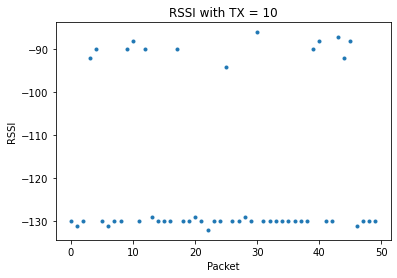

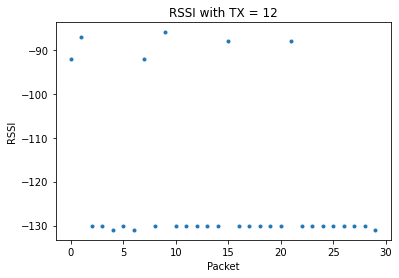

In [20]:
import matplotlib.pyplot as plt

rssi = data[:50,10]
x = list(range(0, len(rssi)))
plt.plot(x, rssi, '.')
plt.title('RSSI with TX = 10')
plt.xlabel('Packet')
plt.ylabel('RSSI')
plt.show()

rssi2 = data[50:100,10]
x = list(range(0, len(rssi2)))
plt.plot(x, rssi2, '.')
plt.title('RSSI with TX = 12')
plt.xlabel('Packet')
plt.ylabel('RSSI')
plt.show()